<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [1]:
# Utilice este espacio para escribir el código.
import pandas as pd

ruta_archivo = 'data/datos_clientes.csv'

# Cargar el archivo CSV en un DataFrame
datos= pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame para verificar que se cargó correctamente
print(datos.head())


   Id_Cliente  Genero  Edad   Ingreso  Puntaje_Gasto
0           1   Mujer    41  98115.05             39
1           2   Mujer    20  35458.14             75
2           3   Mujer    68  59872.08             55
3           4  Hombre    63  48508.93             51
4           5   Mujer    31  44431.11             54


Se cargan los datos de la base datos_clientes

### 2. Análisis preliminar. 

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

In [2]:
# Utilice este espacio para escribir el código.
import matplotlib.pyplot as plt
import seaborn as sns

datos.describe(include='all')

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Mujer,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60624.446600,50.200000
std,57.879185,NaN,13.969007,26262.903416,25.823522
min,1.000000,NaN,18.000000,13458.020000,1.000000
25%,50.750000,NaN,28.750000,41512.787500,34.750000
50%,100.500000,NaN,36.000000,60777.960000,50.000000
75%,150.250000,NaN,49.000000,77143.865000,73.000000


### Analisis
- Del conteo se puede observar que no existen valores nulos en ninguna de las variables
- Genero: De los 200 clientes, 112 son Mujeres lo que representa el 56% de los clientes 
- Edad: se puede observar que el promedio es de 39 años, con un mínimo de 18 y un máximo de 70 años, en el 75% de los clientes tienen edades menores a los 49 años
- Ingreso: Los ingresos anuales promedio de los clientes son de $60624.44 con una desviación de 26262.90 que podría significar una gran variabilidad en esta variable
- Puntaje_Gasto: La mitad de los clientes presentan un puntaje de gasto de 50 puntos, hay que tener en cuenta que el 75% de los clientes tienen un puntaje de gasto menor a 73 lo que se puede considerar un puntaje relativamente alto considerando que el máximo valor que puede tomar esta variable es de 100 puntos


## Analisis por género

In [3]:
# Funcion para graficar un diagrama de dispersion entre el Ingreso y el puntaje de Gasto por la variable seleccionada por ejemplo el genero 
def diagrama_dispersion (variable):
    plt.figure(figsize=(8, 4))

    # Graficar los puntos para cada género
    for genero in datos[variable].unique():
        subset = datos[datos[variable] == genero]
        plt.scatter(
            x=subset['Ingreso'], 
            y=subset['Puntaje_Gasto'], 
            label=genero
        )

    # Añadir etiquetas y título
    plt.xlabel('Ingreso')
    plt.ylabel('Puntaje de Gasto')
    plt.title(f'Ingreso vs Puntaje de Gasto x {variable}')

    # Añadir leyenda
    plt.legend(title=variable)

    # Mostrar el gráfico
    plt.grid(True)
    plt.show()
    

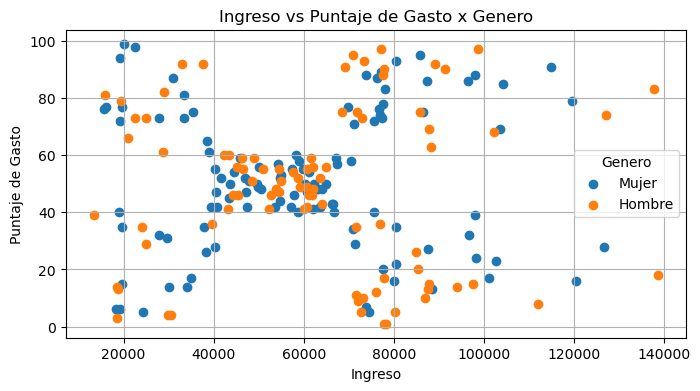

In [4]:
diagrama_dispersion ('Genero')

### Analisis

Del grafico de dispersión por genero se puede observar que no existe un "comportamiento" que identifique más a un género que a otro ya que pareciera que ambos géneros tienen un rango de ingresos y gasto similar, sin embargo, hay 2 puntos que podrían considerarse outliers pues tienen un ingreso cercano a $140000

In [5]:
# Funcion para graficas los graficos de caja de los ingresos y el puntajo por la variable seleccionada
def grafico_caja(variable):
    plt.figure(figsize=(14, 6))

    # Primer subplot para 'Ingreso'
    plt.subplot(1, 2, 1)
    sns.boxplot(x=variable, y='Ingreso', data=datos, palette="muted")
    plt.title(f'Distribución de Ingresos por {variable}')
    plt.xlabel(variable)
    plt.ylabel('Ingreso')

    # Segundo subplot para 'Puntaje_Gasto'
    plt.subplot(1, 2, 2)
    sns.boxplot(x=variable, y='Puntaje_Gasto', data=datos, palette="muted")
    plt.title(f'Distribución del Puntaje de Gasto por {variable}')
    plt.xlabel(variable)
    plt.ylabel('Puntaje de Gasto')

    # Ajustar el diseño
    plt.tight_layout()

In [6]:
grouped_gender = datos.groupby('Genero').agg({
    'Ingreso': ['count','mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['count','mean', 'std', 'min', 'max']
})

grouped_gender.T

Genero                      Hombre          Mujer
Ingreso       count      88.000000     112.000000
              mean    62126.660455   59444.135714
              std     26765.492953   25920.459216
              min     13458.020000   15766.840000
              max    138584.520000  126685.780000
Puntaje_Gasto count      88.000000     112.000000
              mean       48.511364      51.526786
              std        27.896770      24.114950
              min         1.000000       5.000000
              max        97.000000      99.000000

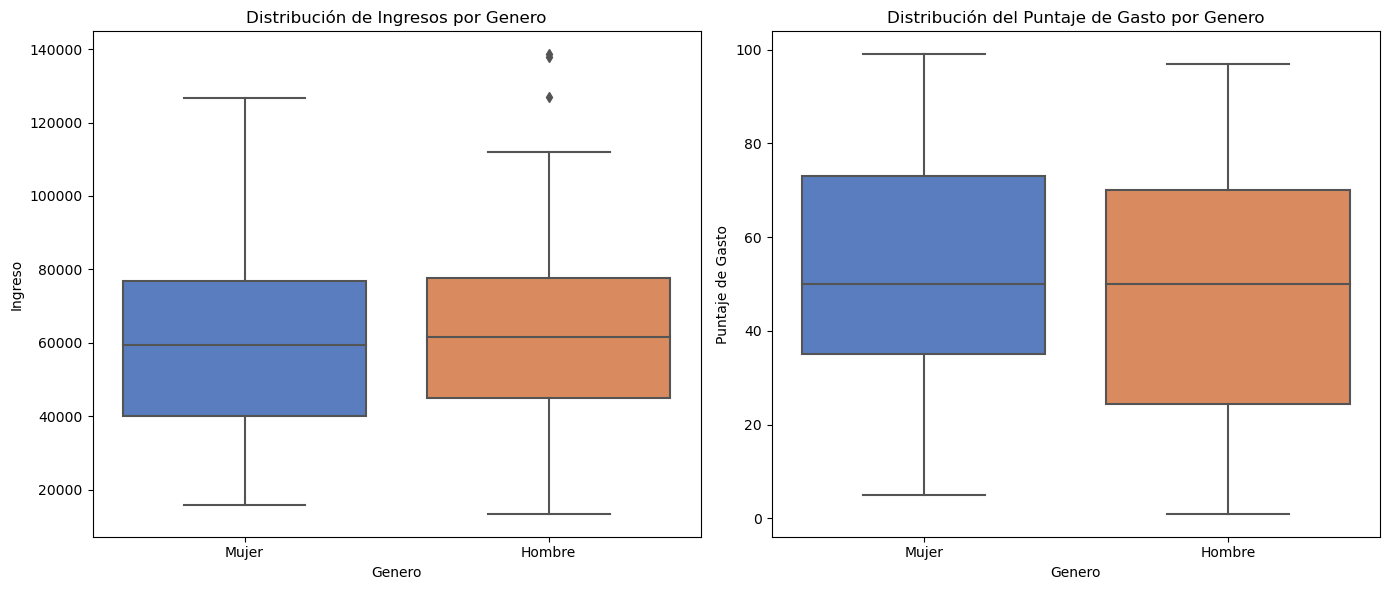

In [7]:
grafico_caja('Genero')  

### Analisis

De la tabla y los gráficos de caja se puede comprobar lo que en cierta medida que se había observado con el diagrama de dispersión pues aunque el ingreso promedio de los hombres es mayor que el de las mujeres la diferencia es mínima así como los valores de los percentiles y la dispersión de los datos es muy similar, mientras que para la variable de puntaje gasto las mujeres presentan una media un poco más alta y tienen una dispersión de cola derecha, mientras que en los hombres es de cola izquierda

## Analisis por grupo etario

In [8]:
def grupos_edad(edad):
    if edad < 25:
        return '18-24'
    elif 25 <= edad < 35:
        return '25-34'
    elif 35 <= edad < 45:
        return '35-44'
    elif 45 <= edad < 55:
        return '45-54'
    elif 55 <= edad < 65:
        return '55-64'
    else:
        return '65+'

# Aplicar la clasificación al DataFrame
datos['Grupo_Etario'] = datos['Edad'].apply(grupos_edad)

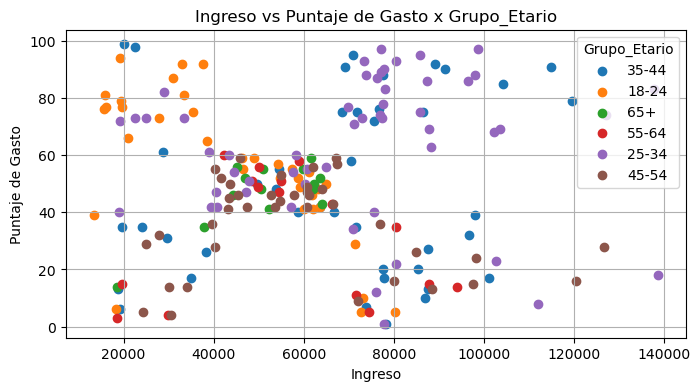

In [9]:
diagrama_dispersion ('Grupo_Etario')

### Analisis

Con el grafico de dispersión se puede observar que los usuarios entre 25-34 y 35-44 son los que presentan ingresos y puntajes de gasto más altos, mientras que los clientes que están entre 18-24 años presentan los ingresos más bajos con un puntaje de gastos alto, por último, para los otros grupos de edades se podría inferir en general que tienen ingresos inferiores a 80000 y un puntaje de gasto inferiores a 60, sin embargo, estas afirmaciones se comprobaran a continuación.

In [10]:
grouped_edad = datos.groupby('Grupo_Etario').agg({
    'Ingreso': ['count','mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['count','mean', 'std', 'min', 'max']
})

grouped_edad.T


Grupo_Etario                18-24          25-34          35-44  \
Ingreso       count     35.000000      54.000000      42.000000   
              mean   44454.795429   71157.328148   66957.096905   
              std    20378.208373   27885.788157   27722.049259   
              min    13458.020000   19003.520000   18797.160000   
              max    80360.650000  138584.520000  119534.680000   
Puntaje_Gasto count     35.000000      54.000000      42.000000   
              mean      56.257143      63.166667      49.428571   
              std       24.659258      24.283506      30.700078   
              min        5.000000       1.000000       1.000000   
              max       94.000000      97.000000      99.000000   

Grupo_Etario                 45-54         55-64           65+  
Ingreso       count      39.000000     16.000000     14.000000  
              mean    58786.491026  56357.093125  51420.789286  
              std     24276.268114  22351.828240  12686.437083  
              min     24402.320000  18434.740000  18437.210000  
              max    126685.780000  94049.490000  64156.370000  
Puntaje_Gasto count      39.000000     16.000000     14.000000  
              mean       36.230769     32.312500     46.714286  
              std        16.261776     21.752299     11.431593  
              min         4.000000      3.000000     14.000000  
              max        59.000000     60.000000     59.000000

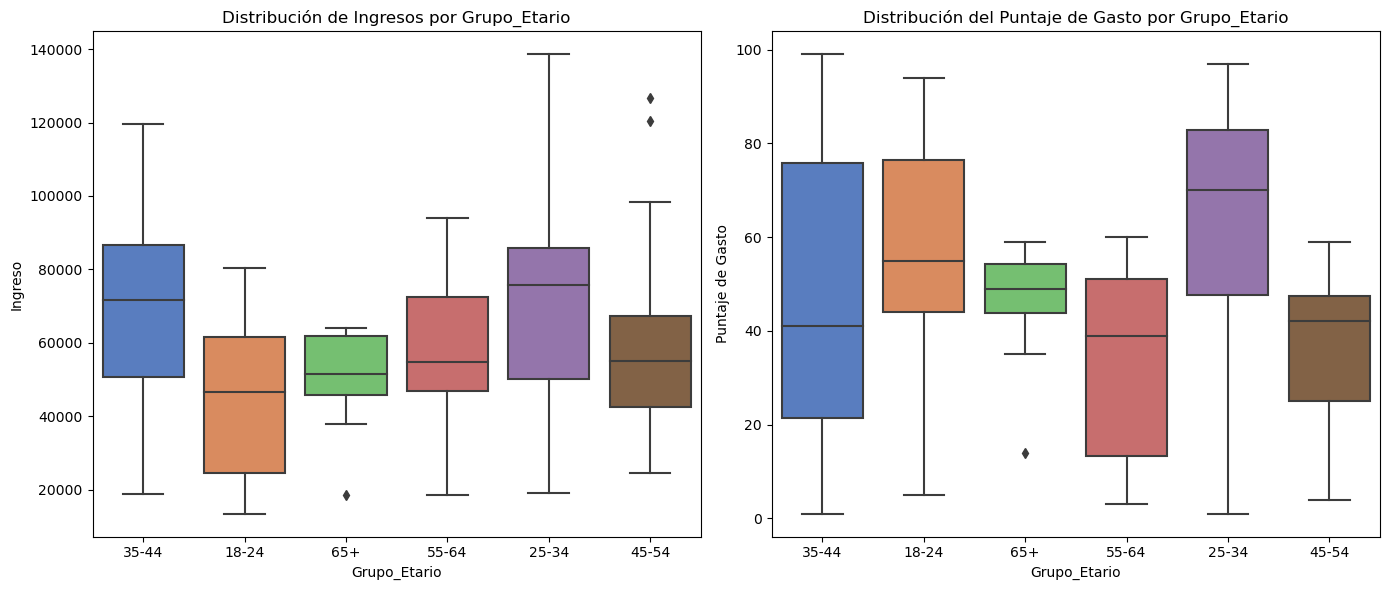

In [11]:
grafico_caja('Grupo_Etario')

### Analisis

Contrario a lo que se asumió en el gráfico de dispersión el rango de edad de 35-44 tienen un puntaje promedio de gasto de 49 puntos, sin embargo se comprueba que este rango de edad junto con los clientes en el rango de 25-34 si tienen un ingreso promedio más alto comparado con los otros grupos de 66957.09 y 71157.32 respectivamente es decir presentan un ingreso promedio mayor que la media del ingreso global(60624.44), mientras que los otros grupos tienen una medio por debajo que la media global donde el grupo de 18-24 es el que presenta el menor ingreso promedio con una dispersión de cola izquierda. Mientras que en cuanto al puntaje de gasto los grupos de 25-34 y 18-24 son los que presentan la media más alta de 63 y 56 respectivamente y adicionalmente considerando que la media global para esta variable es de 50 puntos los clientes en el rango de 25-34 tienen una media significativamente más alta que la media global

## Analisis por Genero y Grupo Etario

In [12]:
grouped_edad_genero = datos.groupby(['Grupo_Etario','Genero']).agg({
    'Ingreso': ['count','mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['count','mean', 'std', 'min', 'max']
})

grouped_edad_genero.T

Grupo_Etario                18-24                        25-34                 \
Genero                     Hombre         Mujer         Hombre          Mujer   
Ingreso       count     16.000000     19.000000      22.000000      32.000000   
              mean   46748.482500  42523.269474   78927.434545   65815.380000   
              std    21515.089905  19749.373173   32734.446993   23049.652497   
              min    13458.020000  15766.840000   22531.850000   19003.520000   
              max    80360.650000  71427.640000  138584.520000  103654.790000   
Puntaje_Gasto count     16.000000     19.000000      22.000000      32.000000   
              mean      51.875000     59.947368      62.454545      63.656250   
              std       27.796583     21.754881      28.468407      21.413908   
              min        5.000000      6.000000       1.000000      22.000000   
              max       92.000000     94.000000      97.000000      95.000000   

Grupo_Etario                35-44                        45-54                 \
Genero                     Hombre          Mujer        Hombre          Mujer   
Ingreso       count     18.000000      24.000000     14.000000      25.000000   
              mean   67001.986111   66923.430000  58029.127143   59210.614800   
              std    22499.533107   31556.048353  20522.769162   26541.550152   
              min    18797.160000   19281.750000  24993.780000   24402.320000   
              max    91426.180000  119534.680000  97525.800000  126685.780000   
Puntaje_Gasto count     18.000000      24.000000     14.000000      25.000000   
              mean      50.777778      48.416667     34.357143      37.280000   
              std       33.502512      29.120315     15.775381      16.754402   
              min        1.000000       6.000000      4.000000       5.000000   
              max       95.000000      99.000000     56.000000      59.000000   

Grupo_Etario                55-64                         65+                
Genero                     Hombre         Mujer        Hombre         Mujer  
Ingreso       count      9.000000      7.000000      9.000000      5.000000  
              mean   55780.227778  57098.777143  51366.806667  51517.958000  
              std    25094.510046  20204.546850  14577.260971   9902.628197  
              min    18434.740000  19617.670000  18437.210000  37926.150000  
              max    94049.490000  80565.010000  64156.370000  62291.260000  
Puntaje_Gasto count      9.000000      7.000000      9.000000      5.000000  
              mean      28.444444     37.285714     46.000000     48.000000  
              std       23.173860     20.385569     13.453624      7.713624  
              min        3.000000      5.000000     14.000000     35.000000  
              max       60.000000     58.000000     59.000000     55.000000

### Analisis 

De la tabla se puede observar que en los rangos de 18 a los 44 años los hombres tienen un ingreso promedio mayor que las mujeres en donde la mayor diferencia se observa en el rango de 25-34 pues el ingreso promedio de los hombres es 19.9% más alto que el de las mujeres y aunque en los otros grupos las mujeres presentan un ingreso promedio la mayor variación es de apenas 2.31%. En cuanto al puntaje de gastos en todos los rangos con excepción del rango 35-44 las mujeres tienen una media más alta la mayor diferencia se encuentra en el rango de 55-64 con una variación del 23.7% con respecto al puntaje de los hombres, sin embargo, hay que tener en cuenta que en este rango la cantidad de datos en hombres y mujeres no supera los 10 clientes, finalmente el rango de 18-24 es en donde se encuentra la segunda mayor diferencia donde se presenta una variación del 13.5%

### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importancia de estandarizar los datos.

In [13]:
# Utilice este espacio para escribir el código.
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generar la base solo con las variables de Ingreso y Puntaje_Gasto
X = datos[['Ingreso', 'Puntaje_Gasto']]

# Estandarizar
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Convertir el array estandarizado de vuelta a un DataFrame
X = pd.DataFrame(X,columns=['Ingreso', 'Puntaje_Gasto'])
X.head(5)

,Ingreso,Puntaje_Gasto
0,1.431094,-0.434801
1,-0.960650,0.962775
2,-0.028719,0.186343
3,-0.462474,0.031057
4,-0.618133,0.147522


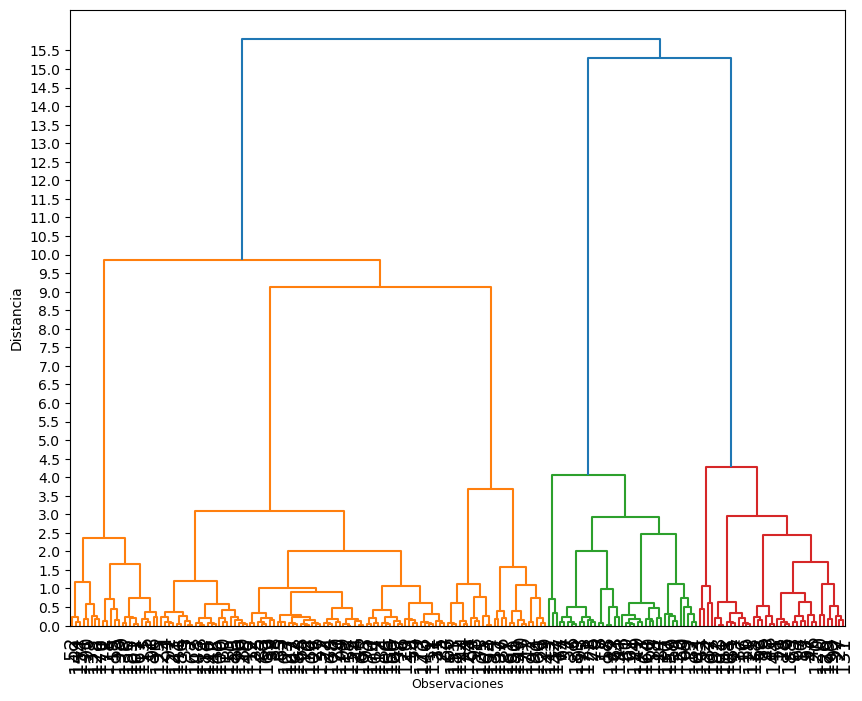

In [14]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

# Crear la matriz de distancias. Usando la distancia euclidiana con el método de Ward
dist = pdist(X, metric='euclidean')
Z = linkage(dist, method='ward')

#dist entonces es la matriz de distancias y Z es la matriz de enlaces que surge de usar el método de Ward
# Con la matriz Z podemos generar y graficar el dendrograma con la función dendrogram()
fig, ax = plt.subplots(figsize=(10, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=9)
ax.set_yticks(np.arange(0, 16, 0.5))
ax.set_ylabel('Distancia', fontsize=10)
plt.show()

### Analisis

Es muy importante estandarizar los datos ya que en este caso al ser los valores del ingreso mucho mayores al calcular la matriz de distancias y el dendograma esta variable dominaría el análisis, por lo que al estandarizar las variables convierte las escalas en un rango más comparable y contribuye a calcular de una manera más adecuada la matriz de distancias y por lo tanto el dendograma

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

Número de clusters a una distancia de corte de 6: 5


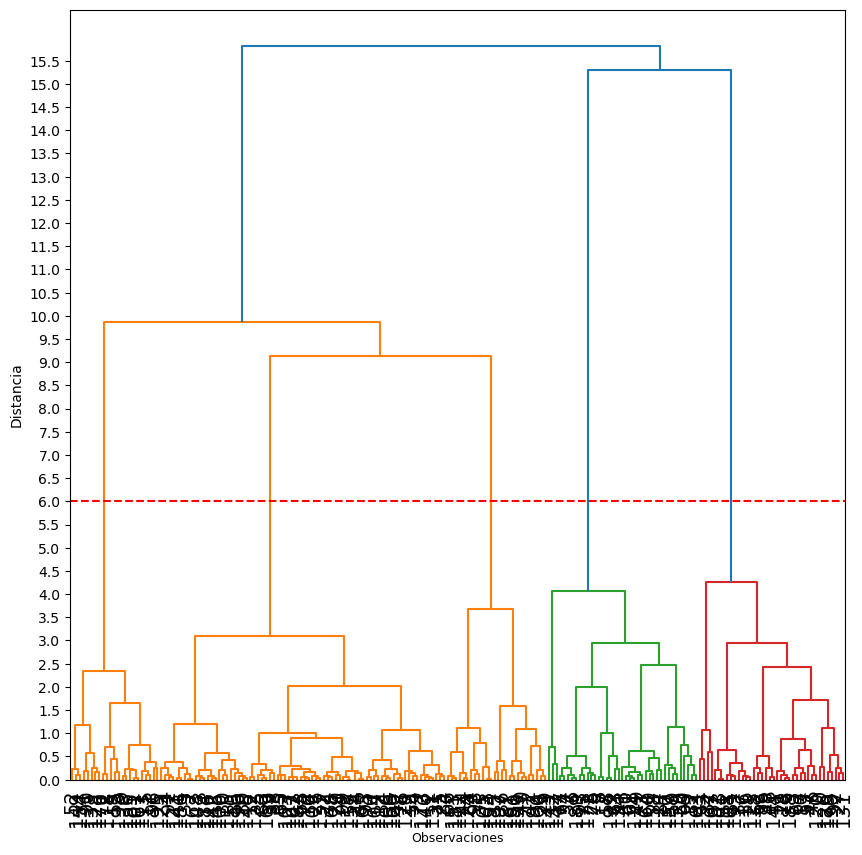

In [15]:
# Utilice este espacio para escribir el código.
corte = 6

distances = linkage(X, method="ward", metric="euclidean")
clusters = fcluster(distances, corte, criterion="distance")

# Número de clusters
num_clusters = len(set(clusters))
print(f'Número de clusters a una distancia de corte de 6: {num_clusters}')

# Grafico del dendograma
fig, ax = plt.subplots(figsize=(10, 10))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)

ax.axhline(y=corte, color='r', linestyle='--', label=f'Distancia de corte = {corte}')

ax.set_xlabel('Observaciones', fontsize=9)
ax.set_yticks(np.arange(0, 16, 0.5))
ax.set_ylabel('Distancia', fontsize=10)
plt.show()

### Resultado

Fijando la distancia en 6 se puede observar que se obtienen 5 clusters 

#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

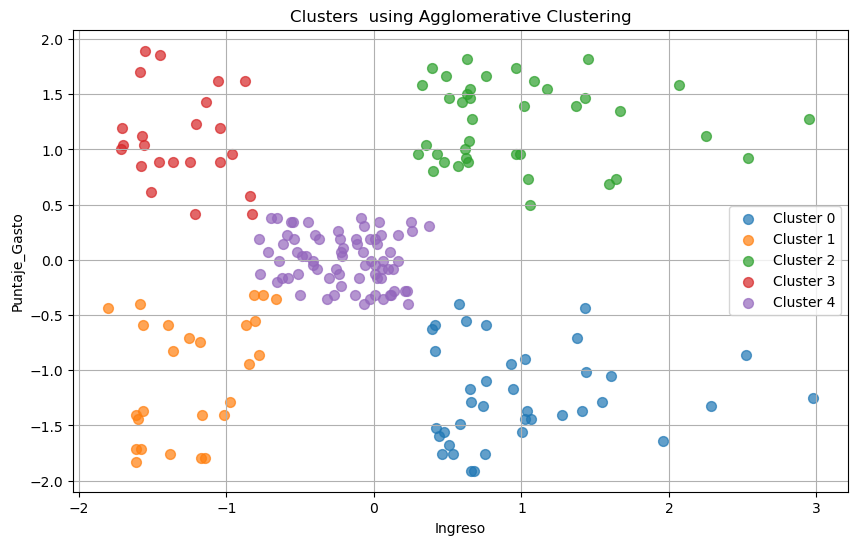

In [16]:
# Utilice este espacio para escribir el código.

from sklearn.cluster import AgglomerativeClustering

cluster_sk = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
#Nota para quiene esten usando la versión 1.4., la opción affinity fue renombrada a metric
cluster_sk = cluster_sk.fit_predict(X)


plt.figure(figsize=(10, 6))
unique_clusters = np.unique(cluster_sk)
for cluster in unique_clusters:
    plt.scatter(
        X.loc[cluster_sk == cluster, 'Ingreso'],
        X.loc[cluster_sk == cluster, 'Puntaje_Gasto'],
        label=f'Cluster {cluster}',
        s=50, alpha=0.7
    )
plt.title('Clusters  using Agglomerative Clustering')
plt.xlabel('Ingreso')
plt.ylabel('Puntaje_Gasto')
plt.legend()
plt.grid(True)
plt.show()

### Analisis

Una estrategia de mercadeo podría ser enfocarse principalmente el en cluster 0 en donde hay una gran oportunidad de mercado pues se trata de clientes que aunque tienen ingresos altos similares a los clientes que se encuentran en el cluster 2, el puntaje de gasto se encuentra por debajo de la media entre aproximadamente -0.5 y -2 veces la desviación estándar de esta variable (ej.: media-0.5*desviación estándar), por lo que para tratar de incrementa puntaje se podrían implementar estrategias de descuento que atraigan más atención y lealtad de los clientes a los productos que vende la tienda.

Cabe resaltar que esta estrategia podría también impactar los clusters 1 y 4 ya que en el cluster 1 aunque está segmentando clientes con ingresos más bajos, los descuentos podrían atraer más a los clientes de este cluster a tener más gastos y por otro lado el cluster 4 al ser un cluster en donde se puede ver que se encuentran una gran concentración de clientes y teniendo en cuenta que tienen ingresos muy cercanos a la media global, la estrategia de descuentos podría tener un impacto más significativo que el cluster 1.

Sin embargo, también es importante enfocarse en los clientes del cluster 2 ya que actualmente son los que tienen mayores ingresos y un puntaje de gasto alto, por lo que se deben implementar estrategias para mantener o mejorar el puntaje de gasto de estos clientes


### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

In [17]:
# !pip install kneed

In [18]:
# Utilice este espacio para escribir el código.

from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# Funcion para definir el eps
def definir_eps (neighbors):
    
    neigh = NearestNeighbors(n_neighbors = neighbors)
    nbrs = neigh.fit(X)
    distancias, indices = nbrs.kneighbors(X)
    distancias = np.sort(distancias.flatten())
    fig=plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
    plt.axhline(y = 0.5, color = 'r', linestyle = '--')
    plt.plot(distancias)
    
    i = np.arange(len(distancias))
    knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    eps = distancias[knee.knee]
    print(eps)
    
    return eps


In [19]:
from sklearn.cluster import DBSCAN

# Funcion para implementar dbscan
def metodo_dbscan (epsilon, min_samples,data,metric='euclidean'):
    db = DBSCAN(eps = epsilon, min_samples = min_samples,metric=metric).fit(data)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(data).assign(Cluster = clusteres)
    plt.figure(figsize=(6,4))
    for k in np.unique(clusteres):
        if k != -1:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 'Ingreso'], 
                y = resultado.loc[resultado.Cluster == k, 'Puntaje_Gasto'],
                label=f'Cluster {k}'
                )
        else:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 'Ingreso'], 
                y = resultado.loc[resultado.Cluster == k, 'Puntaje_Gasto'],
                c = "black",
                label='Outliers'  
                )
    plt.title('Se encontraron %d clusters para epsilon %0.3f y min_samples %d' % (n_clusteres, epsilon,min_samples))
    plt.xlabel('Ingreso')
    plt.ylabel('Puntaje de Gasto')

0.3101533404590082


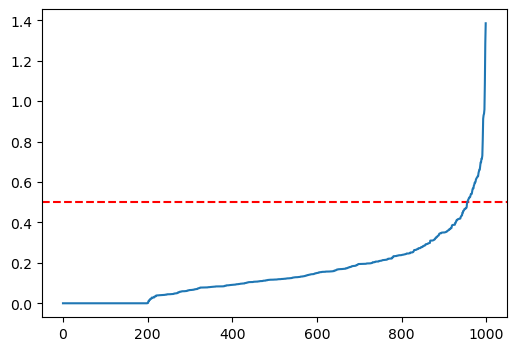

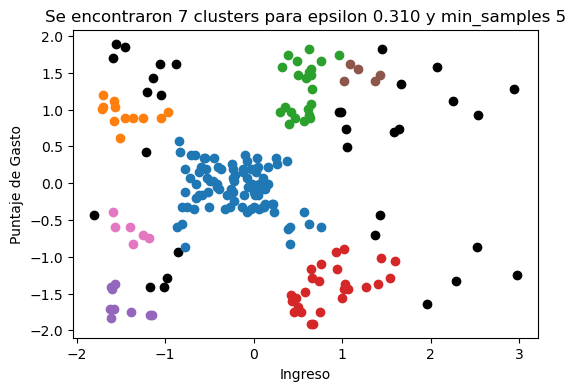

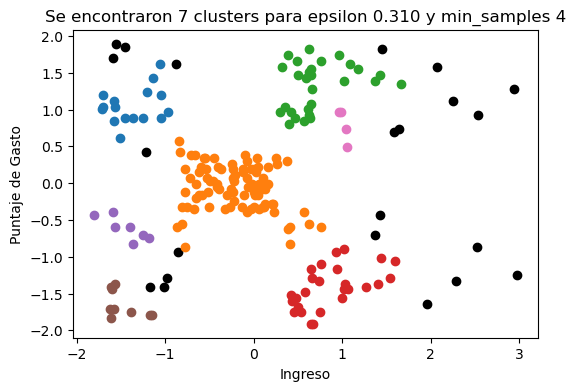

In [20]:
# neighbors = 5, min_samples=neighbors y min_samples=4
n =5
eps_1 = round(definir_eps(n),3)
dbscan_1 = metodo_dbscan (eps_1, n,X)
dbscan_1 = metodo_dbscan (eps_1, 4,X)

0.4934968313866966


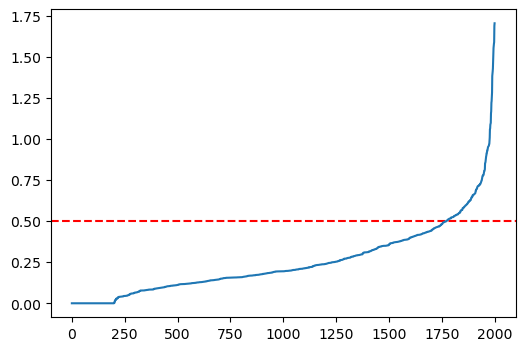

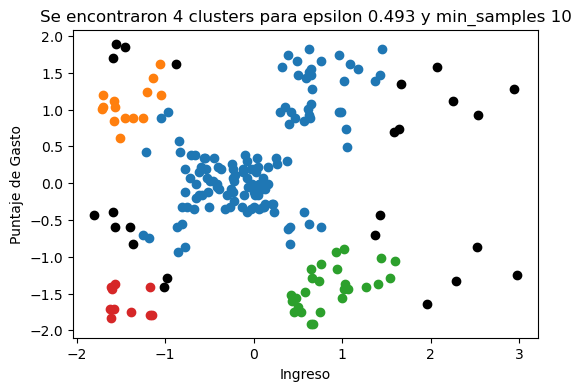

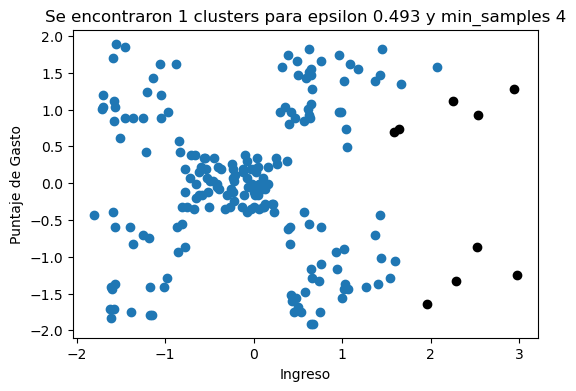

In [21]:
# neighbors = 10, min_samples=neighbors y min_samples=4
n =10
eps_1 = round(definir_eps(n),3)
dbscan_1 = metodo_dbscan (eps_1,n,X)
dbscan_1 = metodo_dbscan (eps_1, 4,X)

0.7332899728300047


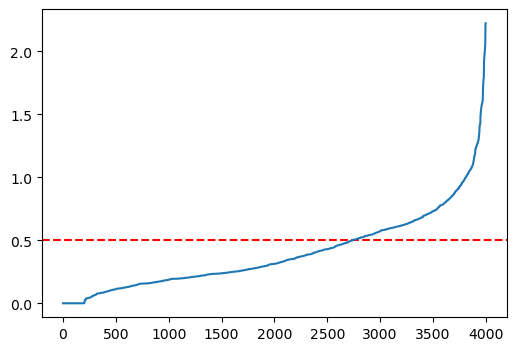

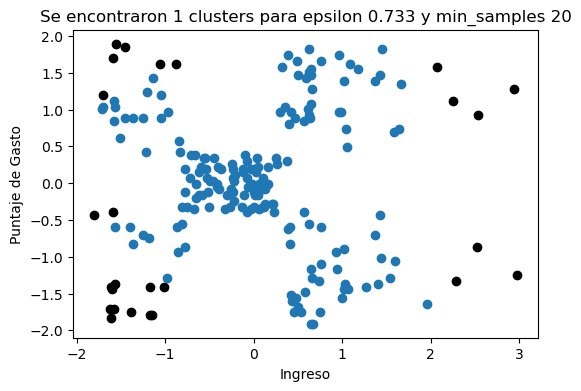

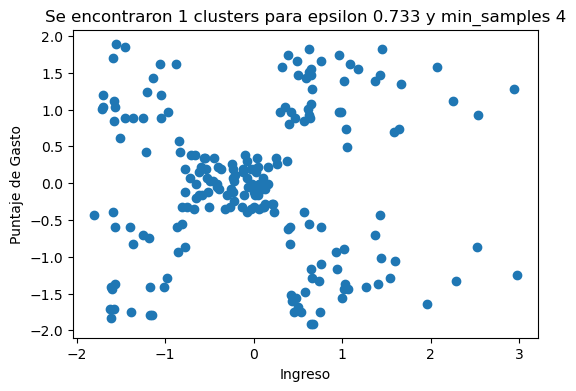

In [22]:
# neighbors = 20, min_samples=neighbors y min_samples=4
n =20
eps_1 = round(definir_eps(n),3)
dbscan_1 = metodo_dbscan (eps_1, n, X)
dbscan_1 = metodo_dbscan (eps_1, 4,X)

0.45789563720443555


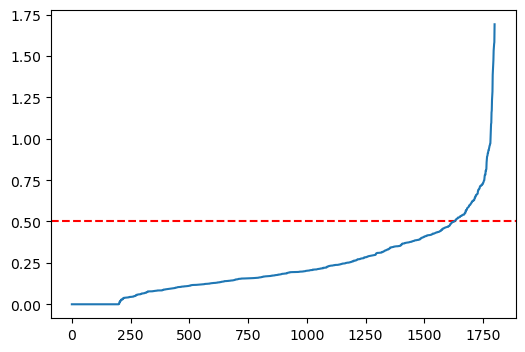

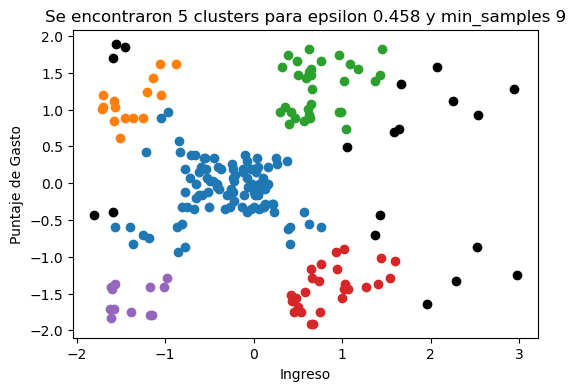

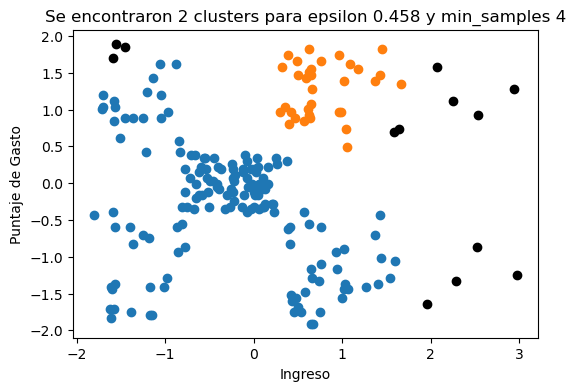

In [23]:
# neighbors = 9, min_samples=neighbors y min_samples=4
n =9
eps_1 = round(definir_eps(n),3)
dbscan_1 = metodo_dbscan (eps_1,n,X)
dbscan_1 = metodo_dbscan (eps_1, 4,X)

### Analisis

En este punto para poder implementar el método de dbscan, se obtuvo el parámetro epsilon a partir de NearestNeighbors y de KneeLocator variando n_neighbors entre 5, 10, 20 y 9 y min_samples igualándolo a n_neighbors y a 4 donde según el taller cuando los datos tienen 2 dimensiones el valor de min_samples puede ser = 4.

Según lo obtenido en las gráficas se toma la decisión de utilizar neighbors = 9, min_sample = neighbors y eps aplicando knees, pues presenta una cantidad de clusters = 5 con característica similares a los obtenidos en el punto anterior, sin embargo, con este método se obtiene la capacidad de detectar los outliers que también pueden ser puntos de interés.

Los clusters obtenidos usando epsilon = 0.310 y min_ samples igual a 5 y 4 también podrían ser una buena opción al generar 7 clusters lo que permitiría identificar con más detalles las características de los clientes en cada cluster, sin embargo, al ser pocos los clientes que se encuentran en estos clusters "adicionales" y adicionalmente dado que nuestro enfoque son principalmente los clientes con altos ingresos y con un puntaje de gasto bajo se optó por el modelo en el cual se obtienen 5 clusters ya que si se compara con los otros dos "modelos" mencionados este grupo de clientes (cluster rojo) es casi idéntico en las 3 opciones y se reducirían los clusters de 7 a 5

Por otro lado, las otras opciones exploradas se descartan debido a que no hacen una buena segmentación de los datos, ya como se observa en las gráficas se generen de 3 a 1 clusters, lo que no brindaría una adecuada información sobre las características que diferencia cada cluster para que se pueda implementar una estrategia de marketing efectiva.

Finalmente, con los parámetros escogidos no cambiaría la estrategia del punto 3.3, debido a que como se mencionó anteriormente, el enfoque es tratar de implementar estrategias de descuento que atraigan a los usuarios con ingresos altos y un puntaje de gasto bajo pues son los clientes con mayor poder adquisitivo y al mismo tiempo tratar de impactar a los clientes en el cluster azul (gasto e ingresos alrededor de la media) pues es un cluster en donde se encuentran una gran cantidad de clientes



### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

In [24]:
# !pip install gower

In [25]:
# Utilice este espacio para escribir el código.

X_g = datos[['Ingreso','Puntaje_Gasto','Genero','Grupo_Etario']]

#Dummies
#X_g= pd.get_dummies(X_g, columns=['Genero', 'Grupo_Etario'], drop_first=True)
X_g['Grupo_Etario'].astype(str)
X_g['Genero'].astype(str)

# Estandarizar
scaler = StandardScaler()
X_g = X_g.copy()
X_g[['Ingreso', 'Puntaje_Gasto']] = scaler.fit_transform(X_g[['Ingreso', 'Puntaje_Gasto']])


import gower

# Distancia de Gower
distance_matrix = gower.gower_matrix(X_g)
distance_matrix = pd.DataFrame(distance_matrix)
distance_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.467024,0.367225,0.629724,0.395525,0.733005,0.381504,0.654588,0.582437,0.503569,...,0.299865,0.386479,0.152487,0.637416,0.724295,0.491610,0.374453,0.408111,0.435238,0.114951
1,0.467024,0.000000,0.349799,0.587300,0.321499,0.526185,0.335520,0.312435,0.651502,0.036545,...,0.516888,0.774423,0.380864,0.503077,0.690945,0.289892,0.342571,0.624760,0.031786,0.352072
2,0.367225,0.349799,0.000000,0.532907,0.283402,0.615780,0.332659,0.537363,0.618029,0.386344,...,0.417090,0.674624,0.366894,0.653278,0.688703,0.374385,0.308248,0.622518,0.318013,0.354314
3,0.629724,0.587300,0.532907,0.000000,0.515800,0.353281,0.615567,0.274864,0.400937,0.623845,...,0.679589,0.437123,0.583987,0.415777,0.405795,0.611886,0.525341,0.339611,0.555514,0.637222
4,0.395525,0.321499,0.283402,0.515800,0.000000,0.337481,0.116061,0.516446,0.401431,0.358044,...,0.195389,0.702924,0.333493,0.681578,0.655301,0.096085,0.274847,0.589117,0.289713,0.387716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.491610,0.289892,0.374385,0.611886,0.096085,0.263707,0.120310,0.587022,0.426088,0.263551,...,0.291475,0.799009,0.405450,0.777663,0.695887,0.000000,0.367157,0.603908,0.306372,0.391965
196,0.374453,0.342571,0.308248,0.525341,0.274847,0.608552,0.390908,0.541293,0.676278,0.379116,...,0.424318,0.681852,0.308646,0.660506,0.380454,0.367157,0.000000,0.564270,0.310785,0.412563
197,0.408111,0.624760,0.622518,0.339611,0.589117,0.348575,0.705178,0.355563,0.490548,0.615867,...,0.687567,0.195101,0.301542,0.423755,0.341979,0.603908,0.564270,0.000000,0.605526,0.476833
198,0.435238,0.031786,0.318013,0.555514,0.289713,0.547767,0.349652,0.280649,0.635022,0.068331,...,0.485102,0.742637,0.349902,0.471291,0.671710,0.306372,0.310785,0.605526,0.000000,0.371307


#### A tener en cuenta
Se calcula la matriz de distancias usando la distancia de Gower, es necesario tener en cuenta que usando esta distancia no es necesario dumificar las variables categoricas de Genero y Grupo etario, por lo que a continuacion se analizaran las caracteristicas de las 4 variables obtenidas en los clusters generados

In [26]:
def find_knee_points(data, n_neighbors_list, metric):
    knee_values = []
    
    plt.figure(figsize=(10, 6), dpi=100)
    
    # Calculo del knee para cada uno de los n_neighbors
    for n in n_neighbors_list:
        neigh = NearestNeighbors(n_neighbors=n, metric = metric)
        nbrs = neigh.fit(data)
        distancias, indices = nbrs.kneighbors(data)
        distancias = np.sort(distancias.flatten())
        
        # Calculo de rodilla
        i = np.arange(len(distancias))
        knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
        knee_value = round(distancias[knee.knee],3)
        knee_values.append(knee_value)
        
        # Generate a color for the line
        line_color = next(plt.gca()._get_lines.prop_cycler)['color']
        plt.plot(distancias, label=f'n_neighbors = {n}', color=line_color)
        plt.axhline(y=knee_value, color=line_color, linestyle='--', label=f'Knee at {n} = {knee_value:.3f}')
    
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.title('Knee Point Analysis for Different n_neighbors')
    plt.legend()
    plt.show()
    
    return knee_values

In [27]:
#funcion para el calculo de DBSCAN
def plot_dbscan_across_epsilons_2(data, epsilon, min_samples, metric='euclidean'):
    # Aplicar DBSCAN con los parámetros proporcionados
    db = DBSCAN(eps=epsilon, min_samples=min_samples, metric=metric).fit(data)
    cluster_labels = db.labels_
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    
    print(f'Para eps = {epsilon} y min_samples = {min_samples}:')
    print(f'Número de clusters: {n_clusters}')
    
    # Crear DataFrame con clusters
    resultado = pd.DataFrame(X_g.copy()).assign(Cluster=cluster_labels)
    
    # Estadísticas descriptivas por cluster
    cluster_summary = resultado.groupby('Cluster').agg({
    'Ingreso': ['count', 'mean'],
    'Puntaje_Gasto': 'mean',
    'Genero': lambda x: x.value_counts().to_dict(),  # Conteo por género
    'Grupo_Etario': lambda x: x.value_counts().to_dict()  # Conteo por grupo etario
    })
    
    #print("\nResumen descriptivo por cluster:")
    #print(cluster_summary)
    
    # Graficar clusters
    plt.figure(figsize=(7, 4))
    for cluster in np.unique(cluster_labels):
        if cluster == -1:
            color = 'black'
        else:
            color = plt.cm.tab10(cluster % 10)  # Usar colormap para colores de clusters
        
        cluster_data = resultado[resultado['Cluster'] == cluster]
        plt.scatter(cluster_data['Ingreso'], cluster_data['Puntaje_Gasto'], c=color, label=f'Cluster {cluster}' if cluster != -1 else 'Outliers')
    
    plt.xlabel('Ingreso (Estandarizado)')
    plt.ylabel('Puntaje de Gasto (Estandarizado)')
    plt.title(f'DBSCAN Clustering with eps={epsilon} and min_samples={min_samples}')
    plt.legend()
    plt.show()
    
    return cluster_summary

In [28]:
#Teniendo en cuanta que para este punto se estan manejando 4 variables se graficaran las "caracteristicas" 

def plot_cluster_characteristics(cluster_summary):
    # Preparar datos para gráficos apilados
    gender_data = {}
    age_data = {}

    # Agregar datos de género
    for cluster in cluster_summary.index:
        if ('Genero', '<lambda>') in cluster_summary.columns:
            gender_counts = cluster_summary.loc[cluster, ('Genero', '<lambda>')]
            for gender, count in gender_counts.items():
                if gender not in gender_data:
                    gender_data[gender] = {}
                gender_data[gender][cluster] = count

    # Agregar datos de grupo etario
    for cluster in cluster_summary.index:
        if ('Grupo_Etario', '<lambda>') in cluster_summary.columns:
            age_counts = cluster_summary.loc[cluster, ('Grupo_Etario', '<lambda>')]
            for age_group, count in age_counts.items():
                if age_group not in age_data:
                    age_data[age_group] = {}
                age_data[age_group][cluster] = count

    # Convertir a DataFrames para gráficos apilados
    gender_df = pd.DataFrame(gender_data).fillna(0).astype(int)
    age_df = pd.DataFrame(age_data).fillna(0).astype(int)

    # Graficar la distribución de género
    plt.figure(figsize=(8, 4))
    gender_df.plot(kind='bar', stacked=True, colormap='tab10')
    plt.title('Distribución de Género en Todos los Clusters')
    plt.xlabel('Género')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

    # Graficar la distribución de grupo etario
    plt.figure(figsize=(8, 4))
    age_df.plot(kind='bar', stacked=True, colormap='tab20')
    plt.title('Distribución de Grupo Etario en Todos los Clusters')
    plt.xlabel('Grupo Etario')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

    # Graficar la media de Ingreso por cluster
    plt.figure(figsize=(8, 4))
    ingreso_means = cluster_summary['Ingreso']['mean']
    ingreso_means.plot(kind='bar', color='skyblue')
    plt.title('Media de Ingreso por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Media de Ingreso (Estandarizado)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Graficar la media de Puntaje de Gasto por cluster
    plt.figure(figsize=(8, 4))
    puntaje_gasto_means = cluster_summary['Puntaje_Gasto']['mean']
    puntaje_gasto_means.plot(kind='bar', color='lightgreen')
    plt.title('Media de Puntaje de Gasto por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Media de Puntaje de Gasto (Estandarizado)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [29]:
def plot_cluster_characteristics(cluster_summary):
    # Preparar datos para gráficos apilados
    gender_data = {}
    age_data = {}

    # Agregar datos de género
    for cluster in cluster_summary.index:
        if ('Genero', '<lambda>') in cluster_summary.columns:
            gender_counts = cluster_summary.loc[cluster, ('Genero', '<lambda>')]
            for gender, count in gender_counts.items():
                if gender not in gender_data:
                    gender_data[gender] = {}
                gender_data[gender][cluster] = count

    # Agregar datos de grupo etario
    for cluster in cluster_summary.index:
        if ('Grupo_Etario', '<lambda>') in cluster_summary.columns:
            age_counts = cluster_summary.loc[cluster, ('Grupo_Etario', '<lambda>')]
            for age_group, count in age_counts.items():
                if age_group not in age_data:
                    age_data[age_group] = {}
                age_data[age_group][cluster] = count

    # Convertir a DataFrames para gráficos apilados
    gender_df = pd.DataFrame(gender_data).fillna(0).astype(int)
    age_df = pd.DataFrame(age_data).fillna(0).astype(int)

    # Crear figura y ejes para 2x2 subplots
    fig, axs = plt.subplots(2, 2, figsize=(16, 8))

    # Graficar la distribución de género
    gender_df.plot(kind='bar', stacked=True, colormap='tab10', ax=axs[0, 0])
    axs[0, 0].set_title('Distribución de Género en Todos los Clusters')
    axs[0, 0].set_xlabel('Género')
    axs[0, 0].set_ylabel('Cantidad')
    axs[0, 0].tick_params(axis='x', rotation=45)
    axs[0, 0].legend(title='Cluster')

    # Graficar la distribución de grupo etario
    age_df.plot(kind='bar', stacked=True, colormap='tab20', ax=axs[0, 1])
    axs[0, 1].set_title('Distribución de Grupo Etario en Todos los Clusters')
    axs[0, 1].set_xlabel('Grupo Etario')
    axs[0, 1].set_ylabel('Cantidad')
    axs[0, 1].tick_params(axis='x', rotation=45)
    axs[0, 1].legend(title='Cluster')

    # Graficar la media de Ingreso por cluster
    ingreso_means = cluster_summary['Ingreso']['mean']
    ingreso_means.plot(kind='bar', color='skyblue', ax=axs[1, 0])
    axs[1, 0].set_title('Media de Ingreso por Cluster')
    axs[1, 0].set_xlabel('Cluster')
    axs[1, 0].set_ylabel('Media de Ingreso (Estandarizado)')
    axs[1, 0].tick_params(axis='x', rotation=0)

    # Graficar la media de Puntaje de Gasto por cluster
    puntaje_gasto_means = cluster_summary['Puntaje_Gasto']['mean']
    puntaje_gasto_means.plot(kind='bar', color='lightgreen', ax=axs[1, 1])
    axs[1, 1].set_title('Media de Puntaje de Gasto por Cluster')
    axs[1, 1].set_xlabel('Cluster')
    axs[1, 1].set_ylabel('Media de Puntaje de Gasto (Estandarizado)')
    axs[1, 1].tick_params(axis='x', rotation=0)

    # Ajustar el diseño
    plt.tight_layout()
    plt.show()

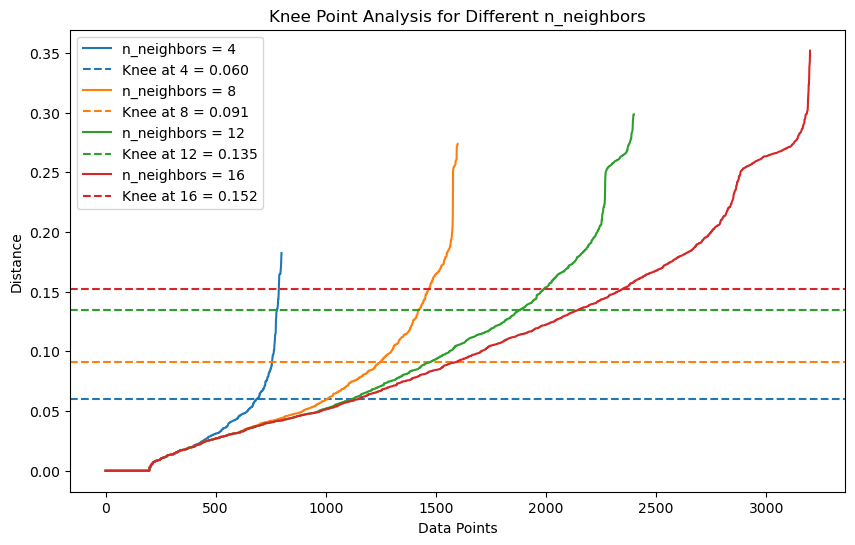

Puntos de rodilla encontrados para diferentes numeros de vecinos:
 [0.06, 0.091, 0.135, 0.152]


In [30]:
# Seleccion de 4 n_neighbors para poder encontrar 4 eps y poder generar los clusters en base a estos
n_neighbors_l = [4,8,12,16]  

# metric='precomputed', está indicando que ya se ha calculado una matriz de distancias entre todas las observaciones,
#y que esta matriz debe ser utilizada por el algoritmo en lugar de calcular la distancia entre los puntos durante el proceso de clustering.

epsilon_list_precomputed = find_knee_points(distance_matrix, n_neighbors_l, metric = 'precomputed')
print('Puntos de rodilla encontrados para diferentes numeros de vecinos:\n', epsilon_list_precomputed)

### Analisis 

De acuerdo a la gráfica anterior se puede observar que a medida que n_neighbors es más grande, el parámetro epsilon también va creciendo 

A continuación, se observarán las características obtenidas del modelo DSCAN usando los eps obtenidos y min_samples igual a los n_neighbors y también usando aplicando min_samples = 2*dim que en este caso son 4 variables.


Para eps = 0.05999999865889549 y min_samples = 4:
Número de clusters: 15


C:\Users\User\AppData\Local\Temp\ipykernel_3876\2321664154.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['Ingreso'], cluster_data['Puntaje_Gasto'], c=color, label=f'Cluster {cluster}' if cluster != -1 else 'Outliers')


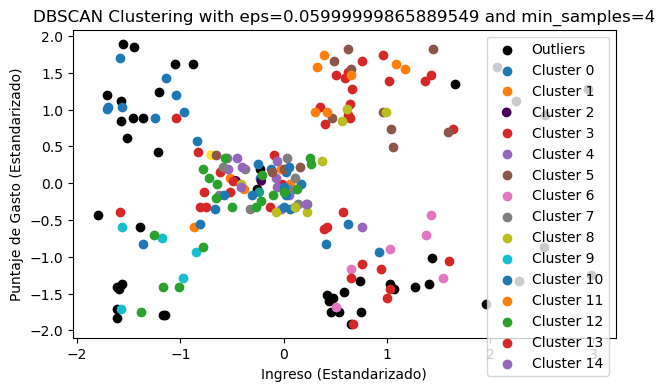

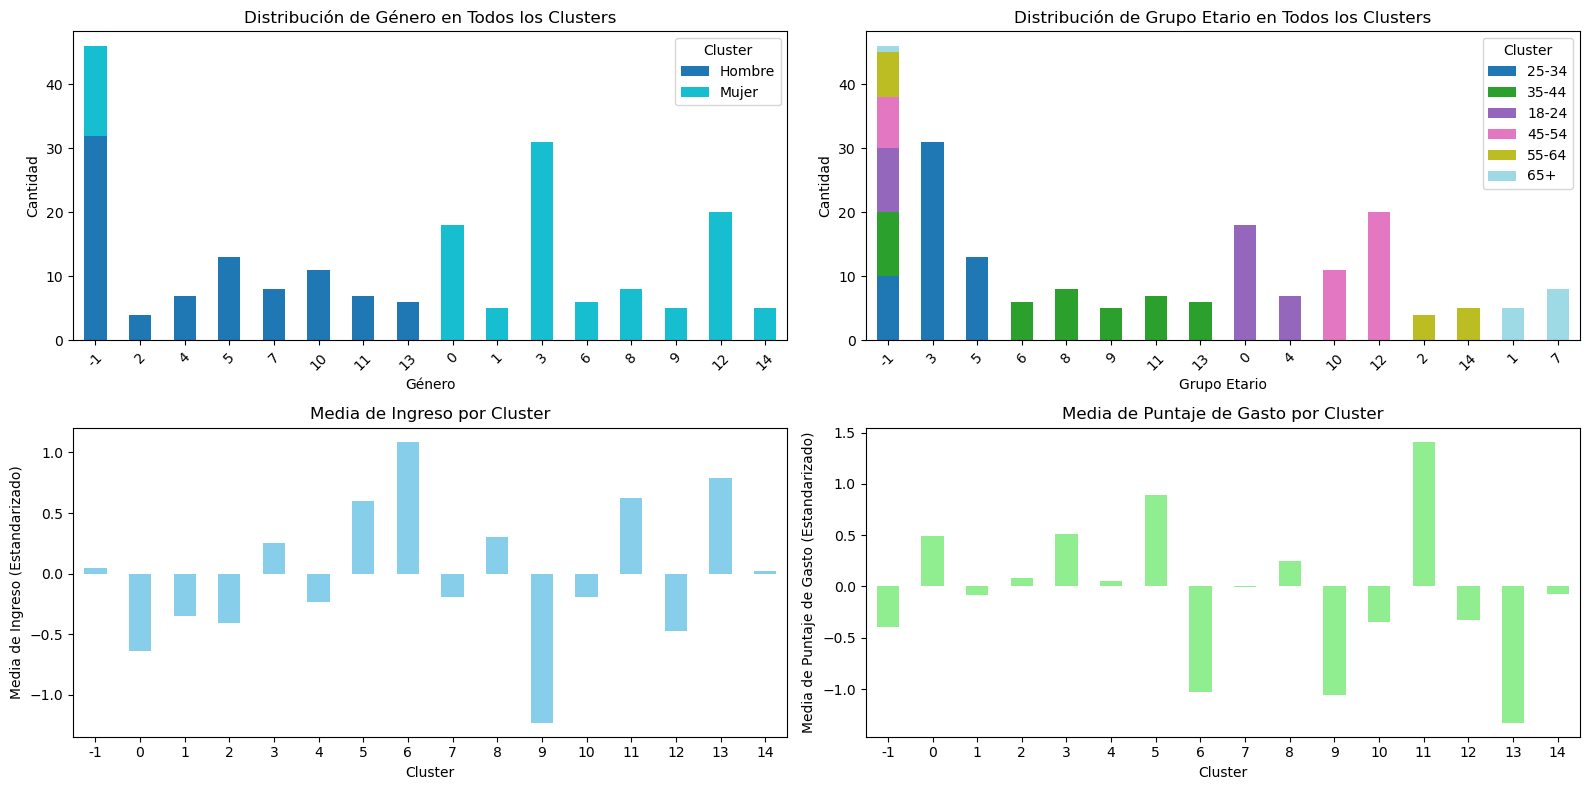

In [31]:
# metric='precomputed', está indicando que ya se ha calculado una matriz de distancias entre todas las observaciones,
#y que esta matriz debe ser utilizada por el algoritmo en lugar de calcular la distancia entre los puntos durante el proceso de clustering.

dbscan_gower_1 = plot_dbscan_across_epsilons_2 (distance_matrix,epsilon_list_precomputed[0], 
                                                n_neighbors_l[0],metric = 'precomputed')
plot_cluster_characteristics(dbscan_gower_1)

### Analisis

Modelo 1

Usando eps=0.0599 y min_samples = 4, se observa que se obtienen 14 clusters lo que podría considerar se una gran cantidad de clusters que más que aportar a la estrategia de marketing la dificultan pues 10 de estos clusters quedan conformados por menos de 10 clientes y el 25% de los clientes se encuentran en el los outliers.

*El clusters -1 son los outliers


Para eps = 0.05999999865889549 y min_samples = 8:
Número de clusters: 6


C:\Users\User\AppData\Local\Temp\ipykernel_3876\2321664154.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['Ingreso'], cluster_data['Puntaje_Gasto'], c=color, label=f'Cluster {cluster}' if cluster != -1 else 'Outliers')


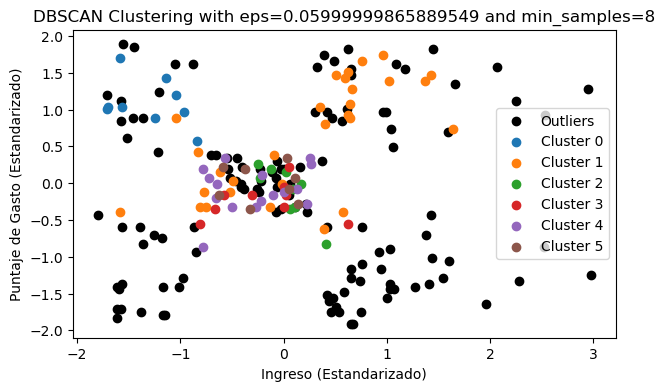

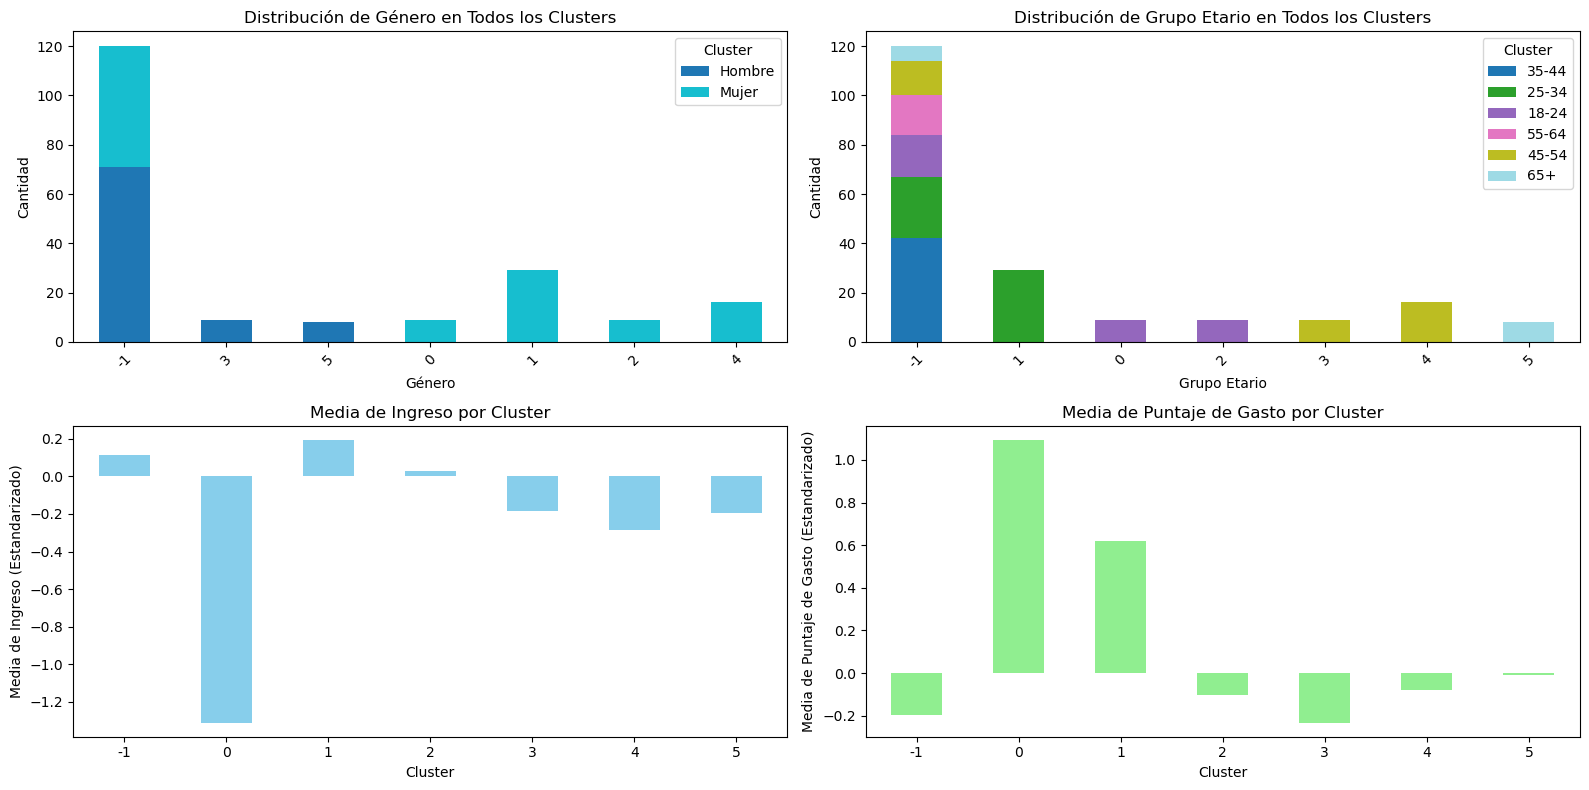

In [32]:
dbscan_gower_2 = plot_dbscan_across_epsilons_2 (distance_matrix,epsilon_list_precomputed[0], 
                                                8,metric = 'precomputed')
plot_cluster_characteristics(dbscan_gower_2)

### Analisis

Modelo 2

Usando el mismo eps de 0.0599, pero ahora con min_samples = 8, se observa que la cantidad de clusters disminuye de 14 a 5 sin embargos al usar un eps tan pequeño con un min_samples más grande se observa el 60% de los clientes se clasificaron como outliers, en donde en este caso este "cluster" está conformado por clientes de ambos géneros y de todos los grupos etarios que son los que presentan una media de ingresos hasta -1.2 desviaciones menos que la media global. Por lo que en ese caso usando estos parámetros la inclusión de las variables del género y grupo etario no aporta en la focalización de estrategias de marketing


Para eps = 0.09099999815225601 y min_samples = 8:
Número de clusters: 9


C:\Users\User\AppData\Local\Temp\ipykernel_3876\2321664154.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['Ingreso'], cluster_data['Puntaje_Gasto'], c=color, label=f'Cluster {cluster}' if cluster != -1 else 'Outliers')


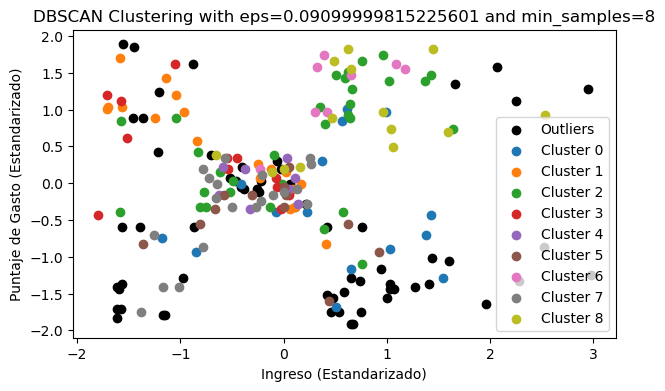

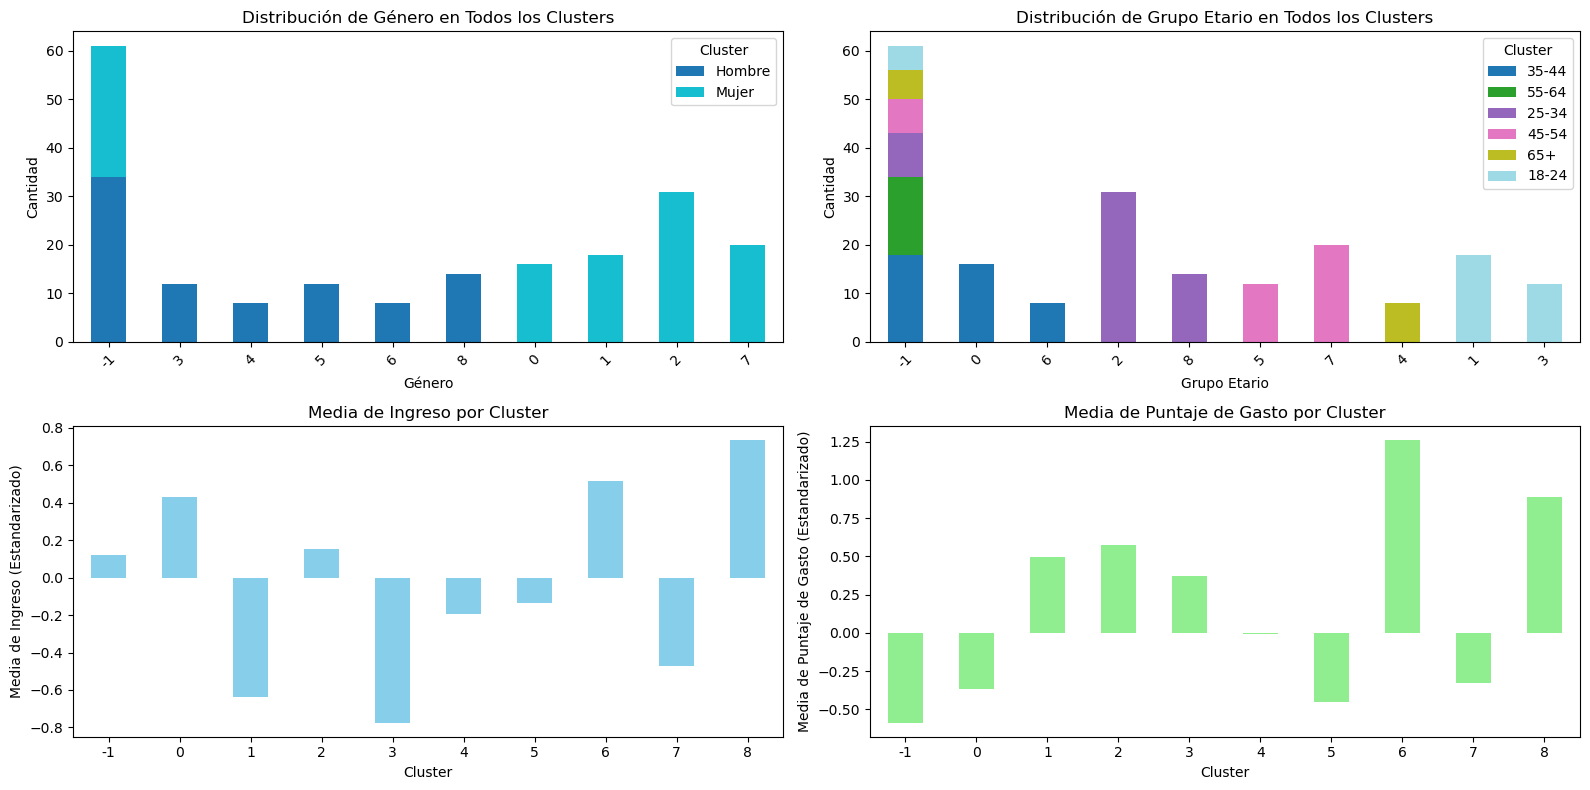

In [33]:
dbscan_gower_3 = plot_dbscan_across_epsilons_2 (distance_matrix,epsilon_list_precomputed[1], 
                                                n_neighbors_l[1],metric = 'precomputed')
plot_cluster_characteristics(dbscan_gower_3)

### Analisis

Modelo 3

Usando eps = 0.09 y min_samples = 8, se observa que se obtienen 8 clustres en donde estan en general clasificados por genero y edad por ejemplo los clusters 0 y 6 estan conformados por clientes en el rango de edades de 35-44, en donde el 0 esta conformado de mujeres y el 6 de hombres, en ambos casos con ingreso promedio entre 0.4 y 0.6 veces la desviacion estandar, sin embargo en este ejemplo se puede observar que las mujeres (cluster 0) a pesar de tener ingresos altos tienen un puntaje de gasto bajo por lo que podria enfocarse las estrategias de marketing en mujeres en los rangos de edad de 35-44, asi como en en los clusters 2 (mujeres) y 8(hombres) que estan conformados por clientes en los rangos de edad de 25-34  con ingresos y puntaje de gastos por  encima de la media por lo que para estos clusters las estrategias podrian estar concentradas en programas dedicados a mantener la fidelidad de estos clientes. 

Para eps = 0.13500000536441803 y min_samples = 12:
Número de clusters: 7


C:\Users\User\AppData\Local\Temp\ipykernel_3876\2321664154.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['Ingreso'], cluster_data['Puntaje_Gasto'], c=color, label=f'Cluster {cluster}' if cluster != -1 else 'Outliers')


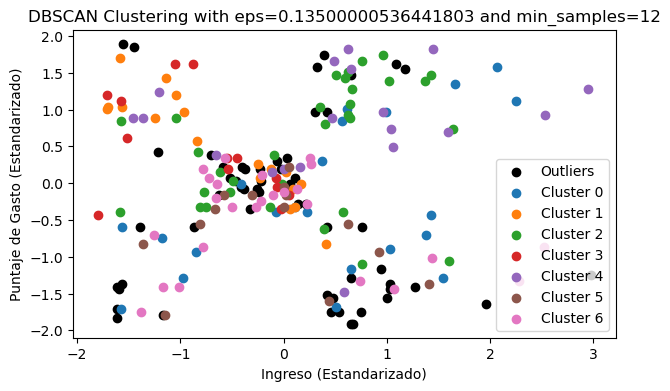

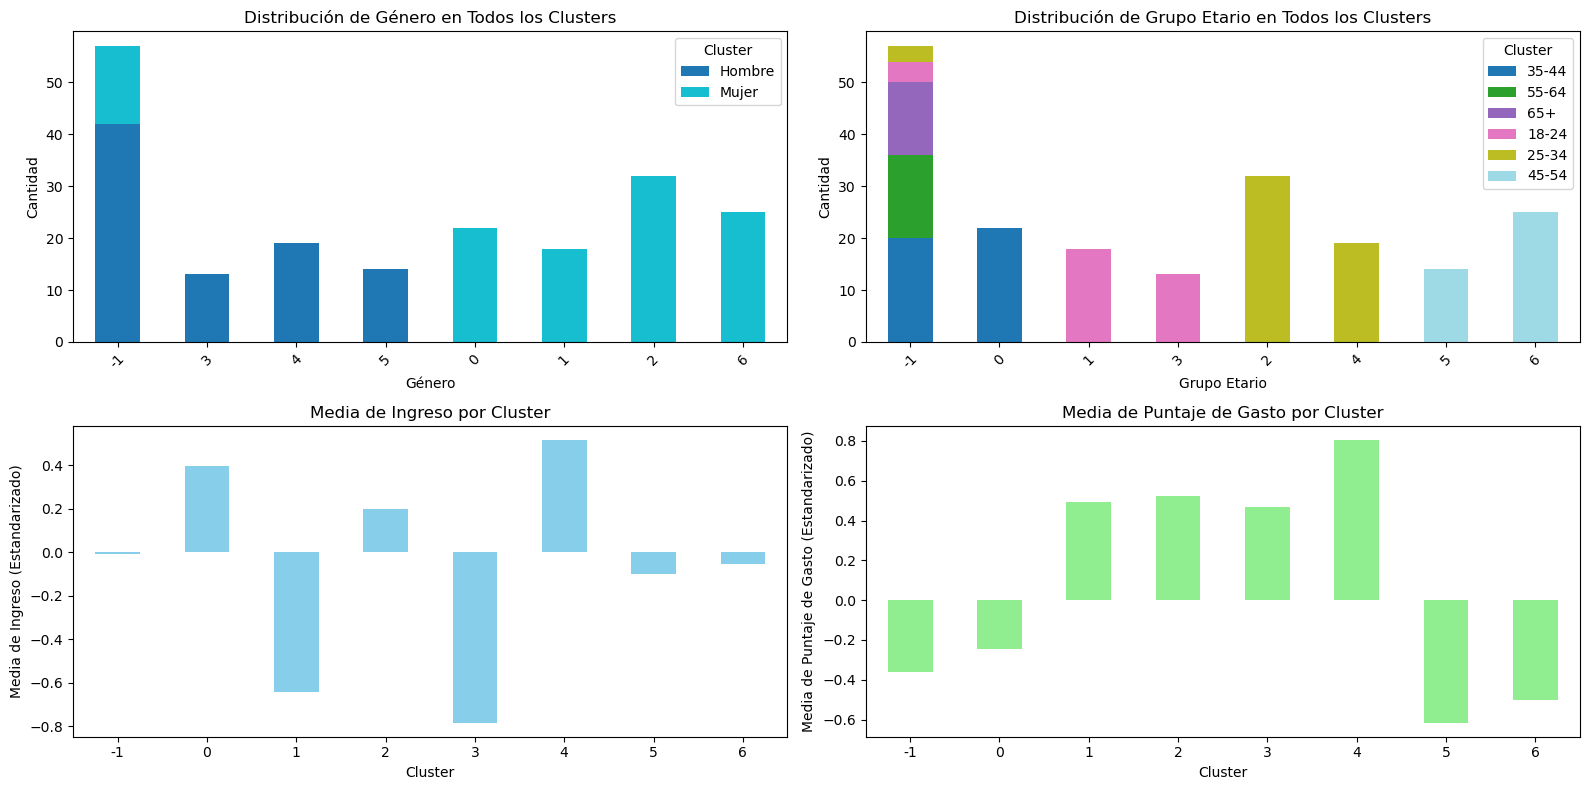

In [34]:
dbscan_gower_4 = plot_dbscan_across_epsilons_2 (distance_matrix,epsilon_list_precomputed[2], 
                                                n_neighbors_l[2],metric = 'precomputed')
plot_cluster_characteristics(dbscan_gower_4)

### Analisis

Modelo 4

Usando eps = 0.135 y min_samples = 12, se observa que se obtienen 6 clusters en donde están en general clasificados por género y edad de los rangos de 18 a 54 años, en donde en este caso una estrategia podría enfocarse en el cluster 0 que está conformado por mujeres de 35-44 años con ingresos por encima de la media pero con un puntaje de gasto bajo, este modelo también podría generar estrategias de marketing interesantes, sin embargo es necesario tener en cuenta que los clientes con edades mayores 54 años los clasifica como outliers, así como también clasifica como outliers a la mitad de los clientes en el rango de edades de 35-44, por lo que en este caso podría brindar más valor dividir la data solo por rango de edades.


Para eps = 0.15199999511241913 y min_samples = 16:
Número de clusters: 5


C:\Users\User\AppData\Local\Temp\ipykernel_3876\2321664154.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['Ingreso'], cluster_data['Puntaje_Gasto'], c=color, label=f'Cluster {cluster}' if cluster != -1 else 'Outliers')


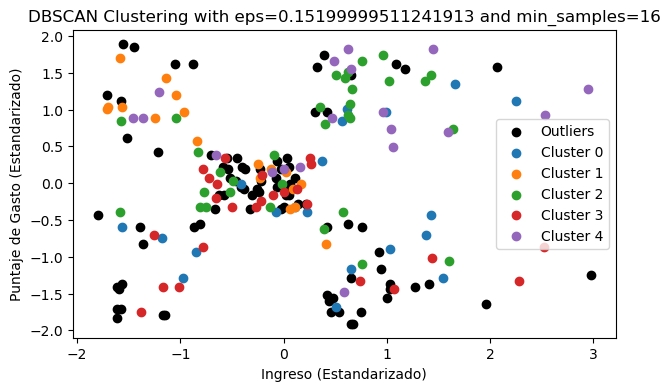

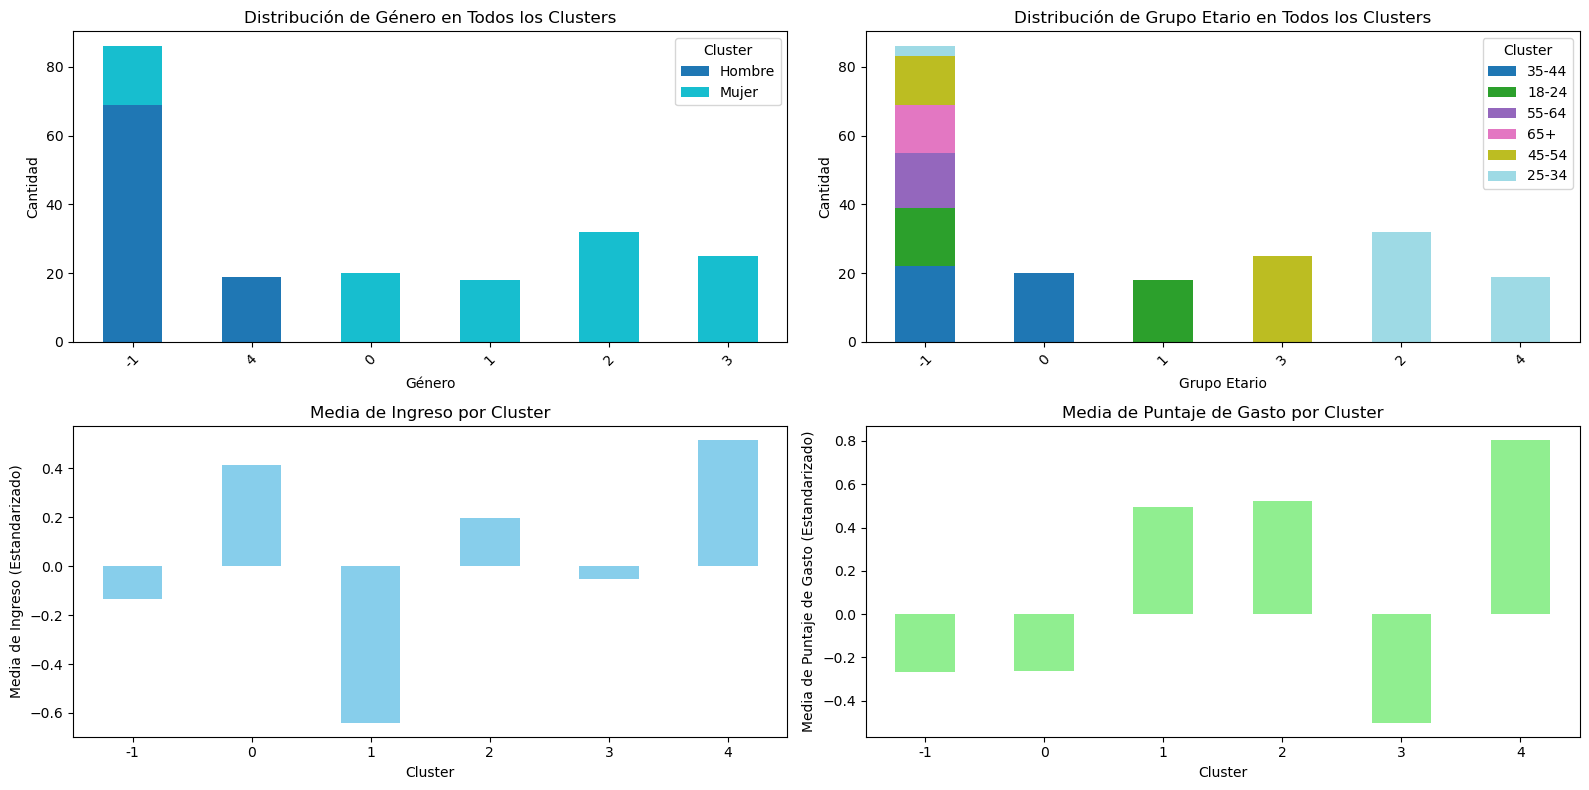

In [35]:
dbscan_gower_5 = plot_dbscan_across_epsilons_2 (distance_matrix,epsilon_list_precomputed[3], 
                                                n_neighbors_l[3],metric = 'precomputed')
plot_cluster_characteristics(dbscan_gower_5)

Para eps = 0.15199999511241913 y min_samples = 8:
Número de clusters: 10


C:\Users\User\AppData\Local\Temp\ipykernel_3876\2321664154.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['Ingreso'], cluster_data['Puntaje_Gasto'], c=color, label=f'Cluster {cluster}' if cluster != -1 else 'Outliers')


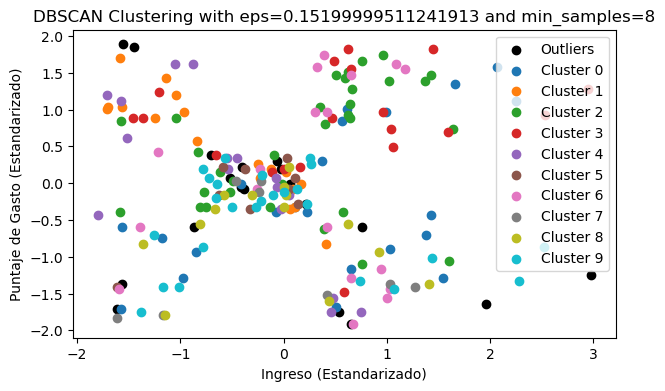

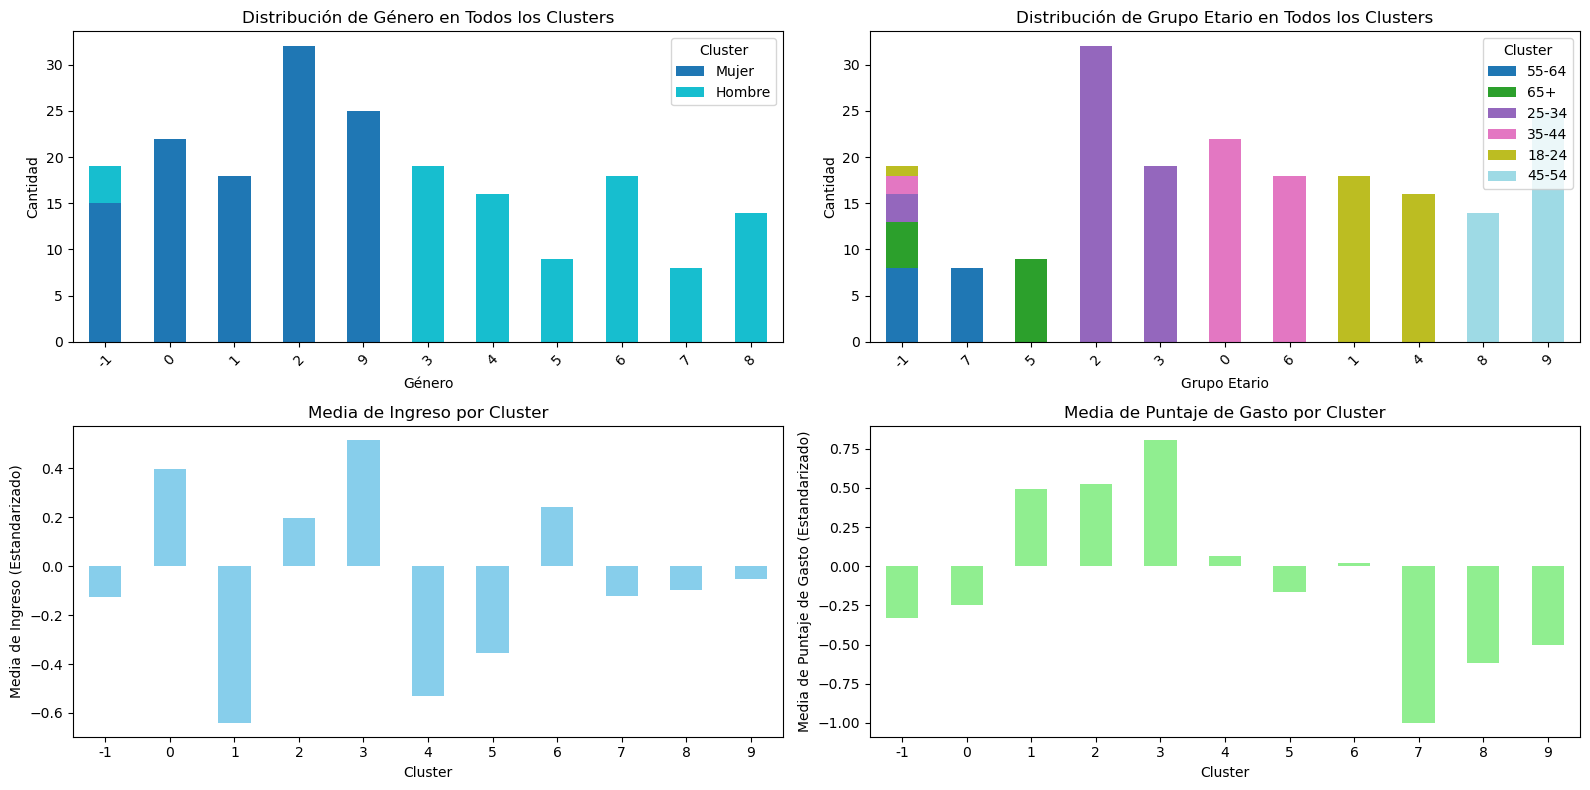

In [36]:
dbscan_gower_6 = plot_dbscan_across_epsilons_2 (distance_matrix,epsilon_list_precomputed[3], 
                                                8,metric = 'precomputed')
plot_cluster_characteristics(dbscan_gower_6)

### Analisis

Modelo 5 y 6

Finalmente usando eps = 0.152 y min_samples = 16 y 8, se observa que se obtienen 6 clusters en donde casi el 50% de los datos los clasifica como outliers por lo que con estos parámetros no se recomendaría dividir los datos por edad y género, por otro lado usando min_samples igual a 8, se obtienen 6 clusters donde menos del 10% de los datos los clasifica como outliers y en donde se puede ver con un "mejor" detalle las características de los ingresos y gastos por rango de edad y género que similar al modelo 3 se podrían focalizar las estrategias de acuerdo a las 4 variables 

### Conclusión

En conclusión si se quiere usar las variables de rango de edades y género es muy importante seleccionar los parámetros de eps y min_samples adecuadamente ya que por ejemplo si se selecciona eps muy pequeño con un min_samples grande o un eps y un min_samples  grande clasifica una gran cantidad de clientes como outliers lo que no aportaría en la definición de las estrategias, mientras que usando eps cercanos a 0.1 con min_samples igual a 8 (2*dim) se podrían generan estrategias usando las 4 variables que ayuden lograr los objetivos de la tienda